In [2]:
import pandas as pd
import numpy as np
from scipy import optimize as opt
import random
import tqdm
import scipy
import math

# Task 1

In [3]:
def brute_force(a, b, f, eps):
    n = int((b - a) // eps)
    values = []
    for k in range(n + 1):
        x_k = a + k * (b - a)/ n
        values.append((x_k, f(x_k)))
    min_value = min(values, key=lambda x: x[1])
    return min_value[0], min_value[1], n
    


In [4]:
def dichotomy_method(a, b, f, eps):
    a_k, b_k = a, b
    delta = np.random.uniform(0, eps)
    n = 0
    while abs(a_k - b_k) >= eps:

        x_1 = (a_k + b_k - delta) / 2
        x_2 = (a_k + b_k + delta) / 2
        if f(x_1) <= f(x_2):
            b_k = x_2
        else:
            a_k = x_1
        n += 1
    return (a_k, b_k), (f(a_k), f(b_k)), n



In [5]:
def gss(a, b, f, eps):
    k_1 = (math.sqrt(5) - 3) / 2
    k_2 = (3 - math.sqrt(5)) / 2
    c = a + (b - a) * k_1
    d = b + (b - a) * k_2
    n = 0
    while abs(b - a) >= eps:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b + (b - a) * k_1
        d = a + (b - a) * k_2
        n += 1
    return (a, b), n

In [6]:
def gss(a, b, f, tol=1e-3):
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    n = 0
    while abs(b - a) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        n += 1
        # We recompute both c and d here to avoid loss of precision which may lead to incorrect results or infinite loop
        c = b - (b - a) / gr
        d = a + (b - a) / gr

    return (a, b), (f(a), f(b)), n

In [7]:
function_list = [
    (0, 1, lambda x: x ** 3),
    (0, 1, lambda x: np.abs(x - 0.2)),
    (0.01, 1, lambda x: x * np.sin(1/x))]

In [228]:
for i, f in enumerate(function_list):
    eps = 0.001
    print('brute force', brute_force(*f, eps))
    print('dichotomy: ', dichotomy_method(*f, eps))
    print('golden search:', gss(*f, eps))
    print('/n')

brute force (0.0, 0.0, 999)
dichotomy:  ((0, 0.0006684562926298639), (0, 2.9868887550114663e-10), 11)
golden search: ((0, 0.0007331374358574044), (0, 3.940544068618271e-10), 15)
/n
brute force (0.2002002002002002, 0.00020020020020020124, 999)
dichotomy:  ((0.1996308359398697, 0.20050046633372456), (0.00036916406013032255, 0.000500466333724553), 11)
golden search: ((0.19970674502565697, 0.20043988246151437), (0.0002932549743430435, 0.00043988246151435706), 15)
/n
brute force (0.22221435793731042, -0.21722868461863132, 989)
dichotomy:  ((0.22172388504402407, 0.2227123124411171), (-0.21720339509710265, -0.21723243621021512), 10)
golden search: ((0.22235669058885385, 0.22308249665035268), (-0.21723200307155432, -0.2172210261692139), 15)
/n


# Task 2

In [8]:
def brute_2d(func, limits, eps):
    ab1, ab2 = limits
    
    a1, b1 = ab1
    n1 = int((b1 - a1) / eps)  
    
    a2, b2 = ab2
    n2 = int((b2 - a2) / eps)
    
    min_y = float("inf")
    min_x = 0
    
    for k1 in tqdm(range(n1 + 1)):
        x1 = a1 + k1 * (b1 - a1) / n1
        for k2 in range(n2 + 1):
            x2 = a2 + k2 * (b2 - a2) / n2
            
            y = func((x1, x2))
            if y < min_y:
                min_y = y
                min_x = (x1, x2)
    return min_x, min_y

In [98]:
def f_linear(x, a, b):
    return a * x + b

def f_rational(x, a, b):
    return a / ( 1 + b * x )

def least_squares(ab):
    a, b = ab
    global func
    return np.sum((func(x, a, b) - y)**2) / x.shape[0]

In [300]:
random.seed(1000)
a, b = random.uniform(0, 1), random.uniform(0, 1)

max_x = 100

deltas = np.random.normal(0, 1, 100)

x = np.array([k / 100 for k in np.arange(0, max_x)])
y = np.array([a * x[k] + b for k in range(len(x))]) + deltas

In [297]:
func = f_linear

brute_opt = opt.brute(least_squares, ranges=((0, a), (0, b)), Ns=1000)
gauss_opt = opt.minimize(least_squares, initial_guess, method='Powell')
nelder_opt = opt.minimize(least_squares, initial_guess, method='Nelder-Mead')

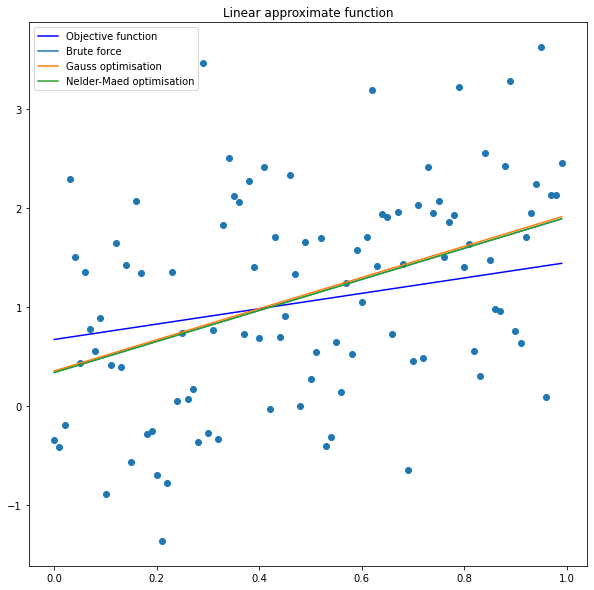

In [298]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
func = f_linear
ax.set_title('Linear approximate function')
ax.scatter(x, y)
ax.plot(x, func(x, a, b), color='blue', label='Objective function')
ax.plot(x, func(x, *(brute_opt)), label='Brute force')
ax.plot(x, func(x, *gauss_opt.x), label='Gauss optimisation')
ax.plot(x, func(x, *nelder_opt.x), label='Nelder-Maed optimisation')
ax.legend()

In [299]:
func = f_rational

brute_opt = opt.brute(least_squares, ranges=((0, a), (0, b)), Ns=1000)
gauss_opt = opt.minimize(least_squares, initial_guess, method='CG')
nelder_opt = opt.minimize(least_squares, initial_guess, method='Nelder-Mead')

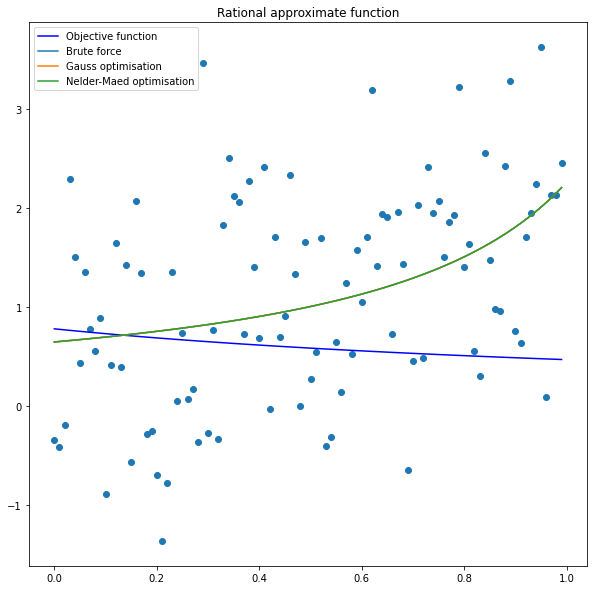

In [300]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_title("Rational approximate function")
ax.scatter(x, y)
ax.plot(x, func(x, a, b), color='b', label='Objective function')
ax.plot(x, func(x, *(brute_opt)), label='Brute force')
ax.plot(x, func(x, *gauss_opt.x), label='Gauss optimisation')
ax.plot(x, func(x, *nelder_opt.x), label='Nelder-Maed optimisation')
ax.legend()

# Task_3

In [267]:
random.seed(1000)
a, b = random.uniform(0, 1), random.uniform(0, 1)

max_x = 100

deltas = np.random.normal(0, 1, 100)

x = np.array([k / 100 for k in np.arange(0, max_x)])
y = np.array([a * x[k] + b for k in range(len(x))]) + deltas

In [14]:
from scipy import optimize as opt

### Linear

In [253]:
def f_linear(x, a, b):
    return a * x + b

def f_rational(x, a, b):
    return a / ( 1 + b * x )

Gradient descent

In [164]:
L = 0.0001  # The learning Rate
epochs = 10**5  # The number of iterations to perform gradient descent
def gradient_descent_linear(x, y, a, b):
    # Performing Gradient Descent 
    for i in range(epochs): 
        y_pred = a * x + b   # The current predicted value of Y
        D_a = (-2/len(x)) * sum(x * (y - y_pred))  # Derivative wrt m
        D_b = (-2/len(x)) * sum(y - y_pred)  # Derivative wrt c
        a = a - L * D_a  # Update m
        b = b - L * D_b  # Update c
    return a, b

def gradient_descent_rational(x, y, a, b):
    # Performing Gradient Descent 
    for i in range(epochs): 
        D_a = -2/len(x) * sum(y/(1+b*x) - (a/(1+b*x)**2))  # Derivative wrt m
        D_b = 2/len(x) * sum((2 * b * a * (y - a /(1+b*x))) / (1 + b * x)**2) 
        a = a - L * D_a  # Update m
        b = b - L * D_b  # Update c
    return a, b


In [251]:
def f_linear_error(w, x, y):
    return w[0] * x + w[1] - y

In [285]:
func = f_linear
w_linear = gradient_descent_linear(x, y, 0, 0)
LM = opt.least_squares(f_linear_error, [0, 0], args=(x, y), method='lm', xtol=1e-05)

In [286]:
conj_grad = opt.minimize(least_squares, (a, b), method='CG', options={'xtol': 1e-5, 'disp': True})
newton_opt = opt.minimize(least_squares, (a, b), method='BFGS', options={'xtol': 1e-5, 'disp': True})
nelder_opt = opt.minimize(least_squares, (a, b), method='Nelder-Mead', options={'xtol': 1e-5, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.946387
         Iterations: 9
         Function evaluations: 54
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.946387
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6
Optimization terminated successfully.
         Current function value: 0.946387
         Iterations: 44
         Function evaluations: 86


<ipython-input-286-f0ba3431ddf5>:1: OptimizeWarning: Unknown solver options: xtol
  conj_grad = opt.minimize(least_squares, (a, b), method='CG', options={'xtol': 1e-5, 'disp': True})
<ipython-input-286-f0ba3431ddf5>:2: OptimizeWarning: Unknown solver options: xtol
  newton_opt = opt.minimize(least_squares, (a, b), method='BFGS', options={'xtol': 1e-5, 'disp': True})


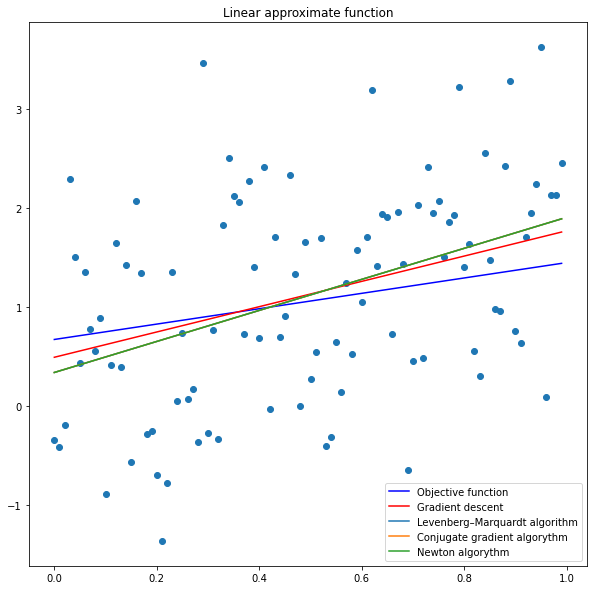

In [287]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_title("Linear approximate function")
ax.scatter(x, y)
ax.plot(x, func(x, a, b), color='b', label='Objective function')
ax.plot(x, x * w_linear[0] + w_linear[1], color='r', label='Gradient descent')
ax.plot(x, LM.x[0] * x + LM.x[1] , label='Levenberg–Marquardt algorithm')
ax.plot(x, func(x, *conj_grad.x), label='Conjugate gradient algorythm')
ax.plot(x, func(x, *newton_opt.x), label='Newton algorythm')

ax.legend()

In [279]:
func = f_rational
w_rational = gradient_descent_rational(x, y, a, b)

In [280]:
conj_grad = opt.minimize(least_squares, (a, b), method='CG', options={'xtol': 1e-5, 'disp': True})
newton_opt = opt.minimize(least_squares, (a, b), method='BFGS', options={'xtol': 1e-5, 'disp': True})
nelder_opt = opt.minimize(least_squares, (a, b), method='Nelder-Mead', options={'xtol': 1e-5, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.956383
         Iterations: 10
         Function evaluations: 82
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.956383
         Iterations: 9
         Function evaluations: 45
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.956383
         Iterations: 55
         Function evaluations: 105


<ipython-input-280-f0ba3431ddf5>:1: OptimizeWarning: Unknown solver options: xtol
  conj_grad = opt.minimize(least_squares, (a, b), method='CG', options={'xtol': 1e-5, 'disp': True})
<ipython-input-280-f0ba3431ddf5>:2: OptimizeWarning: Unknown solver options: xtol
  newton_opt = opt.minimize(least_squares, (a, b), method='BFGS', options={'xtol': 1e-5, 'disp': True})


In [281]:
def f_rational_error(w, x, y):
    return w[0] / (1 + x * w[1]) - y

In [282]:
LM_rational = opt.least_squares(f_rational_error, [0, 0], args=(x, y), method='lm', xtol=1e-05)
lm_w = LM_rational.x

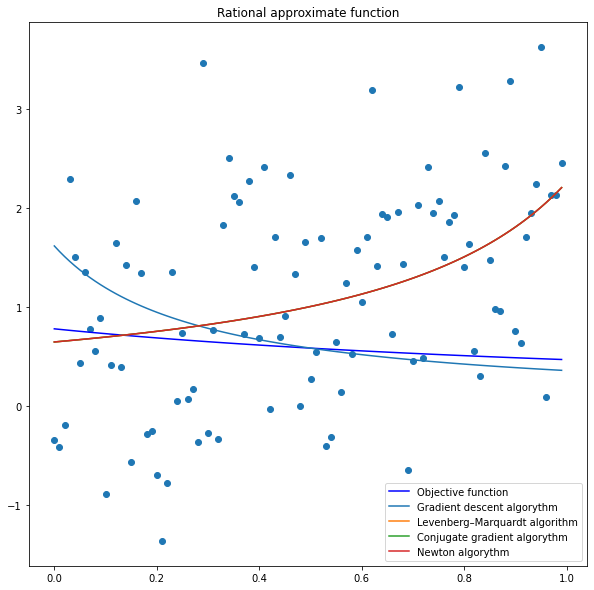

In [284]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_title("Rational approximate function")
ax.scatter(x, y)

ax.plot(x, func(x, a, b), color='b', label='Objective function')
ax.plot(x, w_rational[0]/ (1 + w_rational[1] * x), label='Gradient descent algorythm')
ax.plot(x, [lm_w[0] / (1 + lm_w[1] * x_) for x_ in x], label='Levenberg–Marquardt algorithm')
ax.plot(x, func(x, *conj_grad.x), label='Conjugate gradient algorythm')
ax.plot(x, func(x, *newton_opt.x), label='Newton algorythm')

ax.legend()